In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


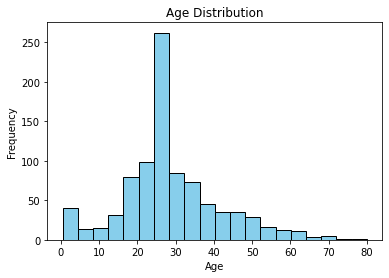

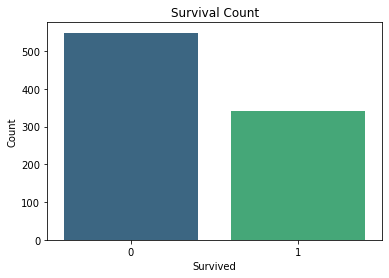

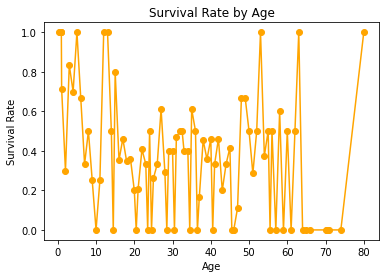

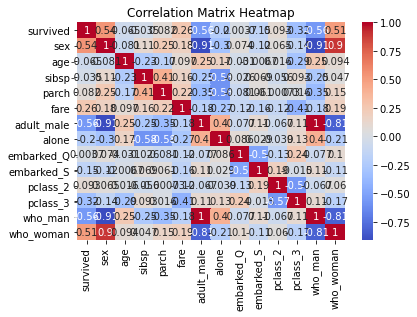

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Titanic dataset from seaborn
titanic_data = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(titanic_data.head())

# Data Cleaning
# Drop unnecessary columns
titanic_data = titanic_data.drop(['alive', 'deck', 'embark_town'], axis=1)

# Handle missing values
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})

# One-hot encoding for selected categorical columns
titanic_data = pd.get_dummies(titanic_data, columns=['embarked', 'pclass', 'who'], drop_first=True)

# Visualization
# Histogram
titanic_data['age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar Chart
sns.countplot(x='survived', data=titanic_data, palette='viridis')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Line Graph
age_survival_mean = titanic_data.groupby('age')['survived'].mean()
age_survival_mean.plot(kind='line', color='orange', marker='o')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

# Heatmap or Box Plot
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
